## Ejercicio Modulo 5

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df = pd.read_csv('/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Borrado de columnas id, host_id, host_name

In [2]:
df = df.drop(['id', 'host_id', 'host_name', 'last_review','name'], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


<Axes: ylabel='price'>

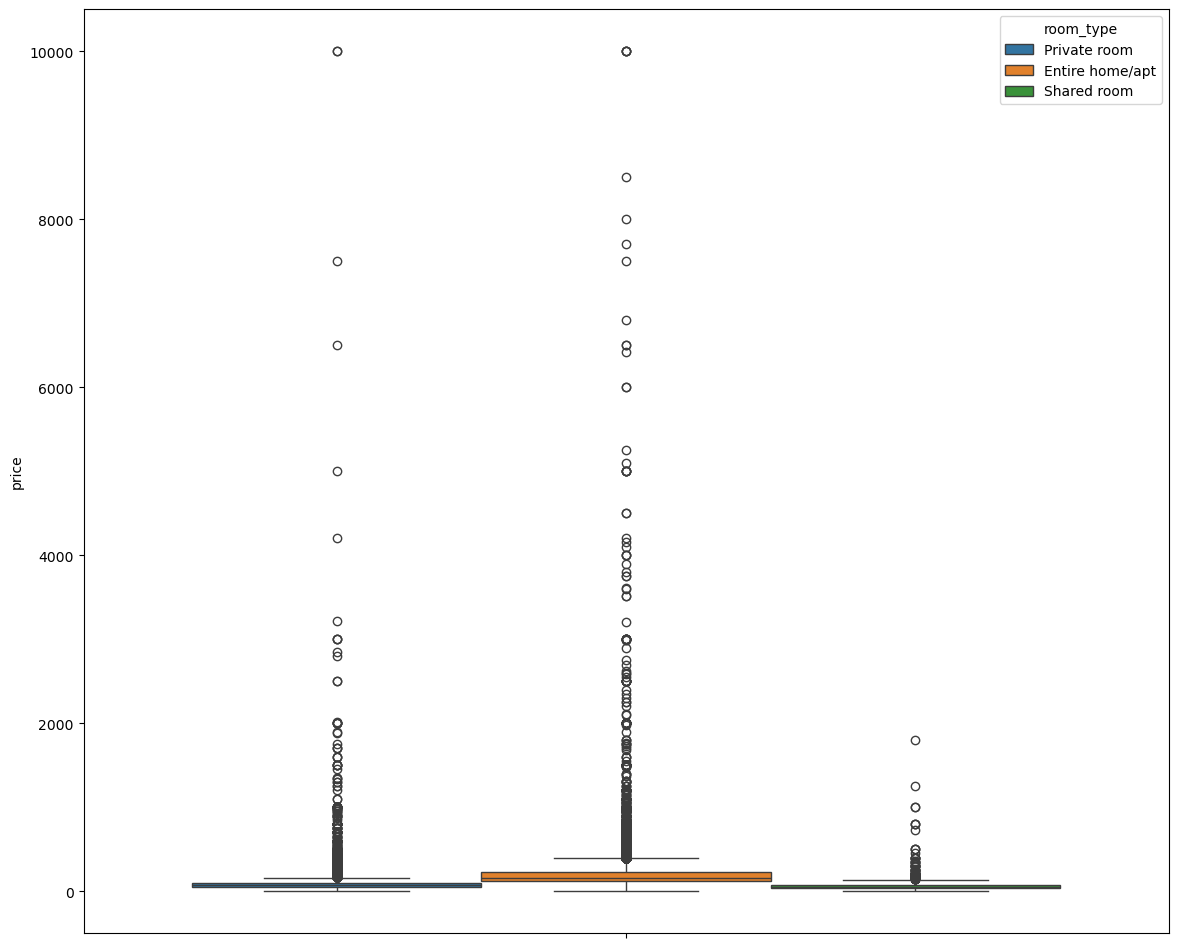

In [4]:
plt.figure(figsize=(14,12))
sns.boxplot(df, hue='room_type', y='price')

<Axes: xlabel='room_type', ylabel='count'>

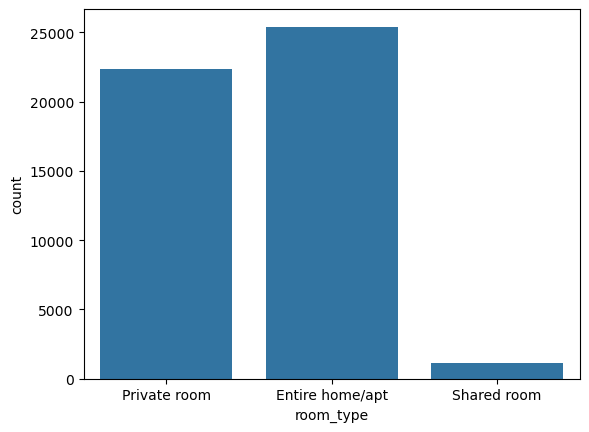

In [5]:
sns.countplot(df, x='room_type')

<Axes: xlabel='price', ylabel='Count'>

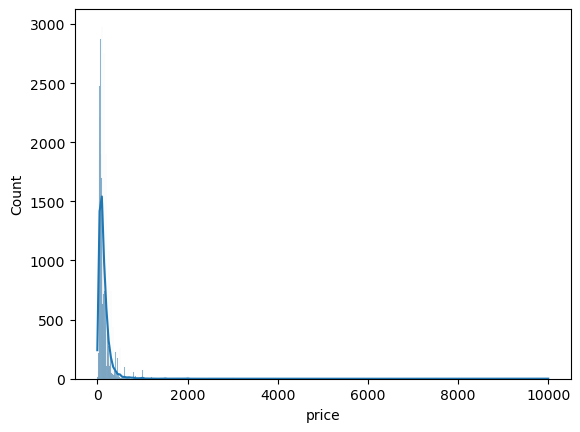

In [6]:
sns.histplot(df, x='price', kde=True)

<Axes: >

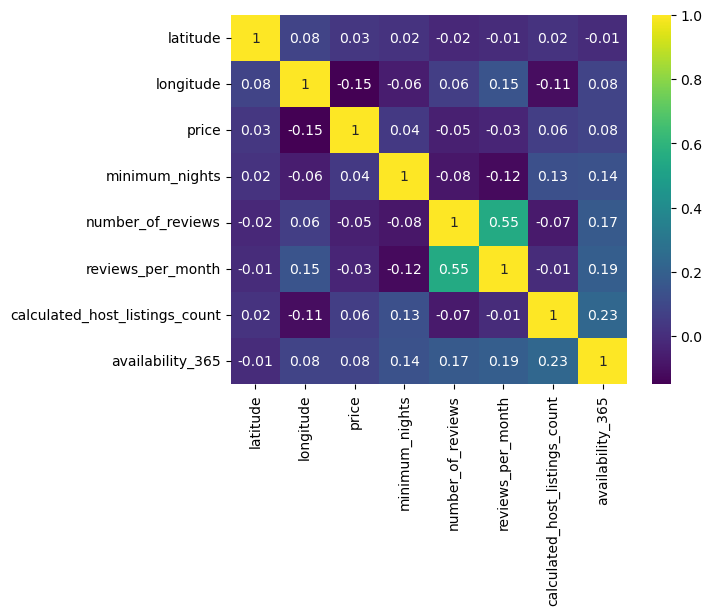

In [7]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='viridis')

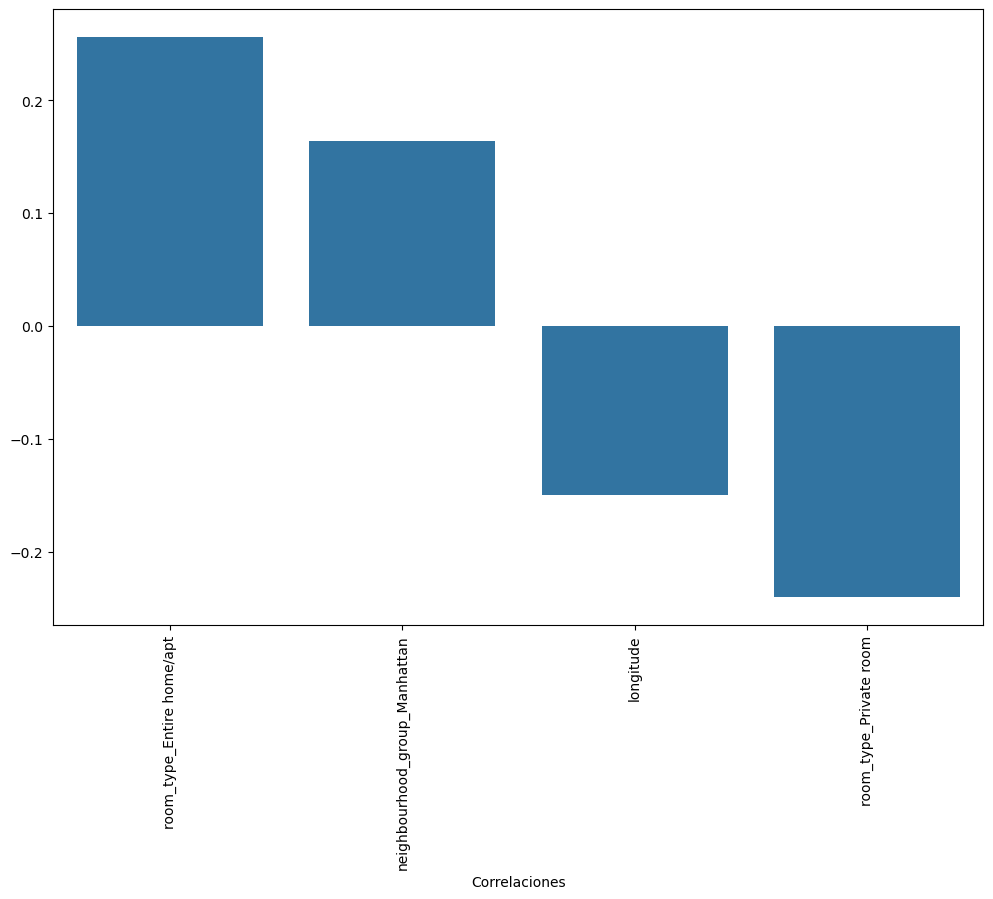

In [8]:
price_correlation=pd.get_dummies(df).corr()['price'].drop(['price'])

#price_correlation
filter = (price_correlation > 0.1) | (price_correlation < -0.1)
filtered_corretation = price_correlation[filter]

filtered_corretation.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x=filtered_corretation.index, y=filtered_corretation.values)
plt.xlabel('Correlaciones')
plt.xticks(rotation=90);

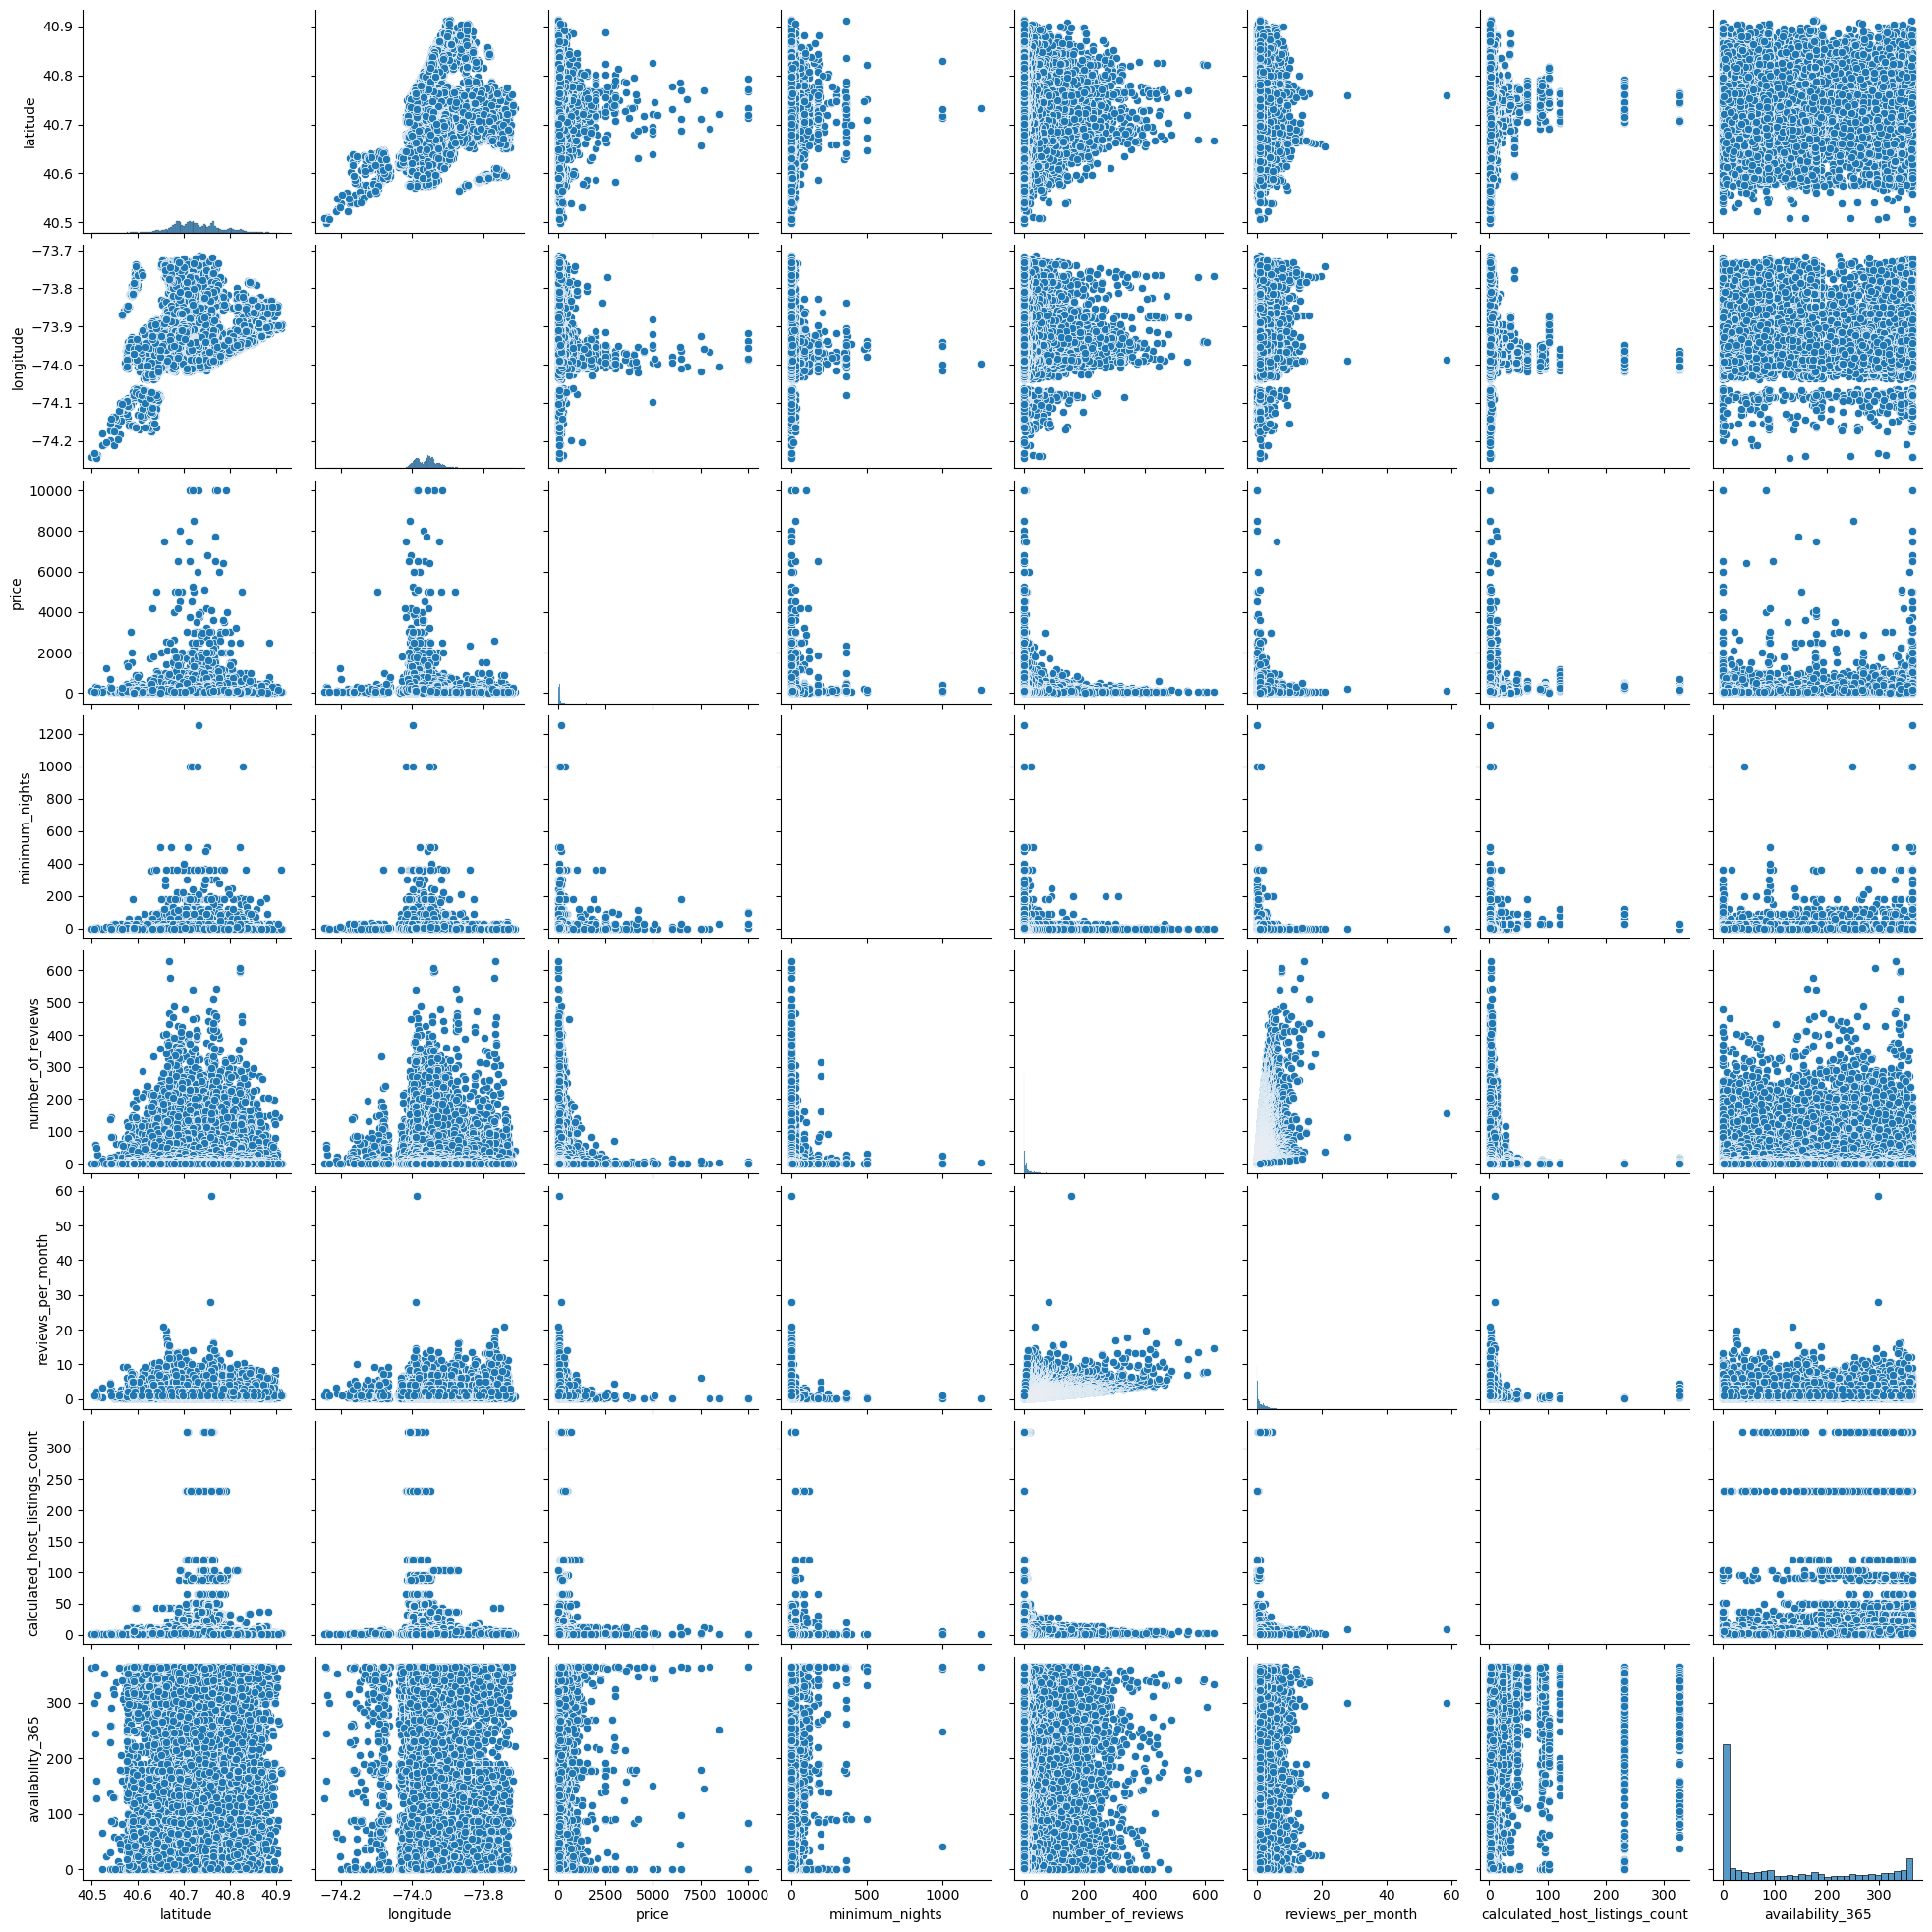

In [9]:
sns.pairplot(df)

## Creación de imputer para transformar los Nans a 0, y textos en others

In [10]:
from sklearn.impute import SimpleImputer

numerical_columns = df.select_dtypes(exclude=['object', 'category']).columns.to_list() 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()

imputer_numerical = SimpleImputer(strategy='constant', fill_value=0)
np_numerical = imputer_numerical.fit_transform(df[numerical_columns]) 

imputer_categorical = SimpleImputer(strategy='constant', fill_value='others')
np_categorical = imputer_categorical.fit_transform(df[categorical_columns])

df_final = pd.concat(
    [
        pd.DataFrame(np_numerical, columns=numerical_columns).reset_index(drop=True), # categoricas
        pd.DataFrame(np_categorical, columns=categorical_columns).reset_index(drop=True) # numéricas
    ],
    axis=1
)
df_final.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0,Brooklyn,Kensington,Private room
1,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0,Manhattan,Midtown,Entire home/apt
2,40.80902,-73.94190,150.0,3.0,0.0,0.00,1.0,365.0,Manhattan,Harlem,Private room
3,40.68514,-73.95976,89.0,1.0,270.0,4.64,1.0,194.0,Brooklyn,Clinton Hill,Entire home/apt
4,40.79851,-73.94399,80.0,10.0,9.0,0.10,1.0,0.0,Manhattan,East Harlem,Entire home/apt


In [11]:
df_final.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64

In [12]:
from sklearn.compose import make_column_selector

# Selector de columnas numéricas
num_selector = make_column_selector(dtype_include=['number'])
columnas_numericas = num_selector(df_final)

# Selector de columnas categóricas
cat_selector = make_column_selector(dtype_include=['object', 'category'])
columnas_categoricas = cat_selector(df_final)

print("Columnas Numéricas:", columnas_numericas)
print("Columnas Categóricas:", columnas_categoricas)

Columnas Numéricas: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Columnas Categóricas: ['neighbourhood_group', 'neighbourhood', 'room_type']


In [13]:

# REGRESIÓN LINEAL MÚLTIPLE

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Separación X y Y
X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
y = df_final['price']

# DataFrame de resultados

df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ['RML 8 col', r2, mae, rmse,mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RML 8 col,0.037264,87.24326,235.634746,1.269075e+14


In [14]:
# Particionamiento para Regresión lineal múltiple

X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
y = df_final['price']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesados', 'R2', 'MAE','RMSE','MAPE'])

def calculate_metrics(prepreocesados_name, x_train, x_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
        
    }
    
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        df_resultados.loc[len(df_resultados)] = [model_name, prepreocesados_name,
                                                r2_score(y_test, y_pred), 
                                                 mean_absolute_error(y_test, y_pred),
                                                 root_mean_squared_error(y_test, y_pred),
                                                 mean_absolute_percentage_error(y_test, y_pred)
                                ]
    return df_resultados.sort_values('R2', ascending=False)

In [15]:
calculate_metrics(' Sin preprocesados', X_train,x_test,y_train, y_test)

,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
4,RandomForest,Sin preprocesados,0.039351,75.444102,206.148981,7.364461e+13
0,LinearRegression,Sin preprocesados,0.038160,84.434829,206.276757,1.053015e+14
2,SVR,Sin preprocesados,-0.030724,78.621955,213.535557,1.011676e+14
1,KNN,Sin preprocesados,-0.254048,93.380652,235.535312,1.125555e+14
3,DecisionTree,Sin preprocesados,-0.588199,95.270989,265.064417,7.184390e+13


## Conteo de Outliers , transformación de la columna Price

In [16]:


X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
y = df_final[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -1.5 *IQR  # LÍMITE INFERIOR
upper_bound = Q1 +1.5 *IQR  # Limite SUPERIOR

filtro = ~((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)
x_train_filter = X_train[filtro]
y_train_filter = y_train[filtro]


filtro = ~((X_test < lower_bound) | (X_test > upper_bound)).any(axis=1)
x_test_filter = X_test[filtro]
y_test_filter = y_test[filtro]

calculate_metrics('Outliers IQR', x_train_filter, x_test_filter, y_train_filter, y_test_filter)

d:\Nueva carpeta\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Nueva carpeta\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
5,LinearRegression,Outliers IQR,0.056355,80.590392,222.904174,1.049338e+14
4,RandomForest,Sin preprocesados,0.039351,75.444102,206.148981,7.364461e+13
0,LinearRegression,Sin preprocesados,0.038160,84.434829,206.276757,1.053015e+14
9,RandomForest,Outliers IQR,0.019430,82.906849,227.223484,1.512908e+14
7,SVR,Outliers IQR,-0.021530,83.818025,231.920716,1.389695e+14
2,SVR,Sin preprocesados,-0.030724,78.621955,213.535557,1.011676e+14
6,KNN,Outliers IQR,-0.112053,95.064453,241.978468,1.312246e+14
1,KNN,Sin preprocesados,-0.254048,93.380652,235.535312,1.125555e+14
8,DecisionTree,Outliers IQR,-0.432113,107.468726,274.601308,1.483811e+14
3,DecisionTree,Sin preprocesados,-0.588199,95.270989,265.064417,7.184390e+13


# Preprocesados

## Creación OneHotEncoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
y = df_final[['price']]
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

pd.get_dummies(X)



,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
0,1.0,9.0,0.21,6.0,365.0,40.64749,-73.97237
1,1.0,45.0,0.38,2.0,355.0,40.75362,-73.98377
2,3.0,0.0,0.00,1.0,365.0,40.80902,-73.94190
3,1.0,270.0,4.64,1.0,194.0,40.68514,-73.95976
4,10.0,9.0,0.10,1.0,0.0,40.79851,-73.94399
...,...,...,...,...,...,...,...
48890,2.0,0.0,0.00,2.0,9.0,40.67853,-73.94995
48891,4.0,0.0,0.00,2.0,36.0,40.70184,-73.93317
48892,10.0,0.0,0.00,1.0,27.0,40.81475,-73.94867
48893,1.0,0.0,0.00,6.0,2.0,40.75751,-73.99112


In [18]:
encoder = OneHotEncoder(sparse_output=False) #sparse_ouput=False para obtenerlo como matriz de 0s y 1s

numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list()
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

x_train_encoded = encoder.fit_transform(X_train[categorical_columns]) # Esto es un array de numpy con las codificaciones
x_test_encoded = encoder.transform(x_test[categorical_columns])

In [19]:
# Pasarlo a dataframe de pandas y juntarlo con las numéricas para obtener resultado como pd.get_dummies
#encoder.get_feature_names_out() # los nombres de las nuevas columnas que sean generado
x_train_final = pd.concat(
  [  
    pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # Categoricas
    X_train[numerical_columns].reset_index(drop=True) # Numéricas
  ],
   axis=1
 )   
 
x_test_final = pd.concat(
  [  
    pd.DataFrame(x_test_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # Categoricas
    x_test[numerical_columns].reset_index(drop=True) # Numéricas
  ],
   axis=1
 )  



In [20]:
df_final.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0,Brooklyn,Kensington,Private room
1,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0,Manhattan,Midtown,Entire home/apt
2,40.80902,-73.94190,150.0,3.0,0.0,0.00,1.0,365.0,Manhattan,Harlem,Private room
3,40.68514,-73.95976,89.0,1.0,270.0,4.64,1.0,194.0,Brooklyn,Clinton Hill,Entire home/apt
4,40.79851,-73.94399,80.0,10.0,9.0,0.10,1.0,0.0,Manhattan,East Harlem,Entire home/apt


#  Clustering y Siluetas

## Creación columna cluster con KMeans

In [21]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
y = df_final[['price']]
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

* Cluster de los 5 Barrios existentes

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

## Metrics Silueta

In [24]:
from sklearn.metrics import silhouette_score

print('kmeans.labels_', kmeans.labels_[:10])
print('kmeans.cluster_centers_: \n', kmeans.cluster_centers_) # Centroides
print('kmeans.inertia_', kmeans.inertia_) # está inercia nos interesa nos de un valor bajo 

print('silhouette_score', silhouette_score(X, kmeans.labels_)) # Está cerca de 1 es buen resultado contra más cerca de 1 es correcto

kmeans.labels_ [3 3 3 2 1 4 1 2 1 2]
kmeans.cluster_centers_: 
 [[ 20.85582255   2.41959335   0.74567468 289.42144177 290.44177449
   40.72938002 -73.99702823]
 [  4.85673045  13.59828269   0.75528332   1.78304156  10.54498686
   40.72952185 -73.9562307 ]
 [  3.02264721 180.63563161   3.78005033   1.99899346 218.03371917
   40.72659    -73.95005252]
 [ 12.14075271  20.26411329   1.12113001  10.02794146 321.24006843
   40.72870151 -73.94635214]
 [  7.64468615  22.33650578   1.49808973   3.97303422 142.65556311
   40.72799439 -73.94439974]]
kmeans.inertia_ 134536064.27008712
silhouette_score 0.6183737720162065


## SelectKBest

In [25]:


from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(score_func=f_classif, k=10) # selcciona y clasifica las 10 mejores

X_train_select = selector.fit_transform(X_train, y_train) 
X_test = selector.transform(X_test)

print('Número de columnas originales',  X_train.shape[1])
print('Número de columnas filtradas',  X_train_select.shape[1])

selected_columns = X_train.columns[selector.get_support()]
print('Columnas seleccionadas', selected_columns.to_list())
print('scores', selector.scores_[:5]) # scores para cada columna de la x , solo imprimimos 5
print('p-values', selector.pvalues_[:5])  # p-values para cada columna de la x, solo imprimimos 5

d:\Nueva carpeta\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(
d:\Nueva carpeta\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Número de columnas originales 7
Número de columnas filtradas 7
Columnas seleccionadas ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']
scores [ 2.05611463  1.91598674  1.81528256 29.24907875  3.63631551]
p-values [2.72586721e-048 9.21022413e-039 2.43334393e-032 0.00000000e+000
 3.25864440e-184]


## PCA  Transformación de dos columnas

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # No usa la "y" porque es un aprendizaje no supervisado
X_pca[:4] # se observa que hay dos columnas y han sido transfortmadas

array([[250.05765409, -26.1924708 ],
       [242.18116086,  10.29825116],
       [249.22675076, -34.23139149],
       [ 96.28583998, 239.04239209]])

In [28]:
print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.83853735 0.09406802]


# Carga de datos para realizar preprocesados

In [29]:
df = pd.read_csv('/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv')
df.drop(['id', 'host_id', 'host_name','last_review'], axis=1, inplace=True)
names = df['name']
df.drop('name', axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Transformación Logarítmica

In [30]:
df['price_log'] = np.log1p(df['price'])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449


## Conteo de Outliers y representación del original y eliminación de outliers

In [31]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

filtro = ~((df['price'] < lower_bound) | (df['price'] > upper_bound))

df_out = df[filtro]

Q1 = df['price_log'].quantile(0.25)
Q3 = df['price_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

filtro = ~((df['price_log'] < lower_bound) | (df['price_log'] > upper_bound))

df_log = df[filtro]

print('original sin outliers: ', df_out.shape)
print('logaritmica sin outliers: ', df_log.shape)

original sin outliers:  (45923, 12)
logaritmica sin outliers:  (48258, 12)


## Regresión

In [32]:
X = df_out.drop(['price', 'price_log'], axis=1)
y = df_out['price']

X_log = df_log.drop(['price', 'price_log'], axis=1)
y_log = df_log['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.20, random_state=42)

In [33]:
numerica = X_train.select_dtypes(include=[np.number]).columns.to_list()
categorica = X_train.select_dtypes(exclude=[np.number]).columns.to_list()

print('Columnas numerica', numerica)
print('Columnas categorica', categorica)

Columnas numerica ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Columnas categorica ['neighbourhood_group', 'neighbourhood', 'room_type']


## Pipeline

In [34]:


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error


df_resultados = pd.DataFrame(columns=['Modelo','R2', 'MAE', 'RMSE', 'MAPE'])

pipeline_categorica = Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
            ])

pipeline_numerica = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerica, numerica),
    ('categorical', pipeline_categorica, categorica)
])
pipeline = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', LinearRegression())]
)
pipeline.fit(X_train_log, y_train_log)
y_pred = pipeline.predict(X_test_log)

r2 = r2_score(y_test_log, y_pred)
mae = mean_absolute_error(y_test_log, y_pred)
rmse = root_mean_squared_error(y_test_log, y_pred)
mape = mean_absolute_percentage_error(y_test_log, y_pred)
df_resultados.loc[len(df_resultados)] = [f'RL Standar con y log', r2, mae, rmse, mape]

df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RL Standar con y log,0.584603,0.313563,0.410583,0.066901


## Proceso de Transformación

In [35]:
from sklearn.preprocessing import QuantileTransformer


modelos = {
    'RF' : RandomForestRegressor(max_depth=10, random_state=42),
    'SVR RBF' : SVR(kernel='rbf'),
}

pipeline_categorical = Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
            ])

for nombre_modelo, modelo in modelos.items():
    pipeline_numerical = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', RobustScaler()),
        ('transformer', QuantileTransformer()),
    ])
    pipeline_all = ColumnTransformer([
        ('numeric', pipeline_numerical, numerica),
        ('categorical', pipeline_categorical, categorica)
    ])
    pipeline = Pipeline([
        ('pipeline', pipeline_all),
        ('modelo', modelo)]
    )
    pipeline.fit(X_train_log, y_train_log)
    y_pred = pipeline.predict(X_test_log)
    
    r2 = r2_score(y_test_log, y_pred)
    mae = mean_absolute_error(y_test_log, y_pred)
    rmse = root_mean_squared_error(y_test_log, y_pred)
    mape = mean_absolute_percentage_error(y_test_log, y_pred)
    df_resultados.loc[len(df_resultados)] = [f'RobustST QuantileTR {nombre_modelo}', r2, mae, rmse, mape]
    print(f'{nombre_modelo}')
        
df_resultados.sort_values('R2', ascending=False).head(10)

RF
SVR RBF


,Modelo,R2,MAE,RMSE,MAPE
1,RobustST QuantileTR RF,0.650231,0.286203,0.376756,0.060970
2,RobustST QuantileTR SVR RBF,0.633725,0.289433,0.385543,0.061177
0,RL Standar con y log,0.584603,0.313563,0.410583,0.066901


# Variación cruzada

In [36]:
from sklearn.model_selection import cross_validate


pipeline_categorical = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
            ])

pipeline_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler()),
    ('transformer', QuantileTransformer())
])
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerica),
    ('categorical', pipeline_categorical, categorica)
])

pipeline_linear = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', LinearRegression())]
)

pipeline_KNN = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', KNeighborsRegressor())]
)

pipeline_RF = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', RandomForestRegressor(max_depth=10,random_state=42))]
)

models = {
    'LinearRegression': pipeline_linear,
    'KNN': pipeline_KNN,
    'RandomForest': pipeline_RF
}

df_list = []
for name, model in models.items(): 
    
    results = cross_validate(model, X_log, y_log, cv=5, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'])
    df_model = pd.DataFrame(results)
    df_model['modelo'] = name
    df_list.append(df_model)

df_resultados_cross = pd.concat(df_list, ignore_index=True) 

In [37]:
df_resultados_cross.sort_values('test_r2', ascending=False).head(5)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error,modelo
13,121.102836,0.433388,0.641203,-0.296889,-0.153337,-0.063424,-0.391582,RandomForest
14,123.219313,0.355052,0.631067,-0.331261,-0.183006,-0.069933,-0.427792,RandomForest
4,0.884388,0.074077,0.623853,-0.336356,-0.186585,-0.071113,-0.431954,LinearRegression
11,120.986868,0.260535,0.608918,-0.290658,-0.146286,-0.062282,-0.382473,RandomForest
12,112.280341,0.545054,0.608275,-0.298041,-0.152795,-0.064746,-0.390890,RandomForest


## GridSearchCV con múltiples métricas

In [38]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# X_log = df_log.drop(['room_type'', 'room_type_log'], axis=1)
# y_log = df_log['price_log']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.20, random_state=42)


# #clasificación multiclase
# # X = df.drop('room_type', axis=1)
# # y = df['room_type']
# model = DecisionTreeRegressor(random_state=42)
# params = {
#     'max_depth': np.arange(1,10),
#     'min_samples_split': np.arange(2,10),
#     'criterion': ['squared_error', 'absolute_error']
# }
# grid = GridSearchCV(model, params, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], refit='neg_mean_absolute_error', verbose=1) # cv=5 por defecto
# grid.fit(X, y)


## Cargo de nuevo el Dataset para Vectorizar la columna **name**

In [39]:
df = pd.read_csv('/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv')
df.drop(['id', 'host_id', 'host_name','last_review'], axis=1, inplace=True)
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [40]:
df.dropna(subset=['name'], inplace=True)

In [41]:
df.isnull().sum()

name                                  0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf_vectorized = tfidf_vect.fit_transform(df["name"])

print("Dimensiones de X_tfidf_vectorized:", X_tfidf_vectorized.shape)
print("Matriz TF-IDF (sparse):\n", X_tfidf_vectorized)
print("Vocabulario:\n", tfidf_vect.vocabulary_)

Dimensiones de X_tfidf_vectorized: (48879, 8057)
Matriz TF-IDF (sparse):
   (0, 2383)	0.42171232289093824
  (0, 5844)	0.41536717810493995
  (0, 1425)	0.29694438900973397
  (0, 3937)	0.39294879058587423
  (0, 2127)	0.4417861504081154
  (0, 6948)	0.31728906095838594
  (0, 5445)	0.33346176841060265
  (1, 6416)	0.6916552305675296
  (1, 4896)	0.33020807178183686
  (1, 2212)	0.6423205363046544
  (2, 6948)	0.3331768774312027
  (2, 7371)	0.3773982024192273
  (2, 5307)	0.35452054848665554
  (2, 3809)	0.44436734369355635
  (2, 5168)	0.41492017945461346
  (2, 7704)	0.5012562761669267
  (3, 5307)	0.3693724888764809
  (3, 2630)	0.31761486308354836
  (3, 3170)	0.5262440573870645
  (3, 3431)	0.5246289475924709
  (3, 2046)	0.45882068678562116
  (4, 1425)	0.2825630505730014
  (4, 2127)	0.4203899685611768
  (4, 5445)	0.31731185373056126
  (4, 3170)	0.457703848776451
  :	:
  (48875, 6082)	0.2506533344352006
  (48875, 7554)	0.37909680505564003
  (48875, 1256)	0.6490851305623477
  (48875, 2109)	0.442121769

## Clasificación Sin y con SMOTE

In [43]:
from sklearn.datasets import make_classification


X, y = make_classification(
    n_samples=500, # número total de filas
    n_features=10, # número de columnas en la X
    n_redundant=0, # número de columnas rebundantes
    n_clusters_per_class=1,
    n_informative=2,
    weights=[0.95, 0.5], # datos desbalanceados 
    class_sep=1,
    random_state=42
)

print(X[:5])
print(y[:5])
print(np.bincount(y))  # Vemos el desbalanceo cuenta cuántos 1 y 0 hay

[[-0.45888426 -0.1726273  -1.57639216  1.07868083  0.55723719 -0.14853686
   0.65232288  1.68392769  0.88365994 -0.03850847]
 [-0.62567729 -0.80003856 -0.45730166 -1.31924719 -0.38276059 -0.60823551
   1.23743813  1.09646923 -0.06352457 -0.20298064]
 [ 2.86840306 -0.17280174 -0.7331562  -1.66859926  1.42421958 -3.13114743
   0.44130715  0.01249932  0.77192015  1.05872853]
 [-0.25004651 -0.13430874 -1.74853197  0.28869363  0.78763668 -1.38472705
   0.79348872  1.3924653   0.81080827  0.26032184]
 [ 1.41222056 -1.06239353  0.98573    -0.07964139  0.21467126 -0.79216421
  -0.18714427  0.02421946  0.4283071   0.4523718 ]]
[0 0 0 0 0]
[472  28]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print('Tamaño X_train', X_train.shape)
print('Distribución clase train', np.bincount(y_train))
print('Tamaño X_test', X_test.shape)
print('Distribución clase test', np.bincount(y_test))

Tamaño X_train (400, 10)
Distribución clase train [378  22]
Tamaño X_test (100, 10)
Distribución clase test [94  6]


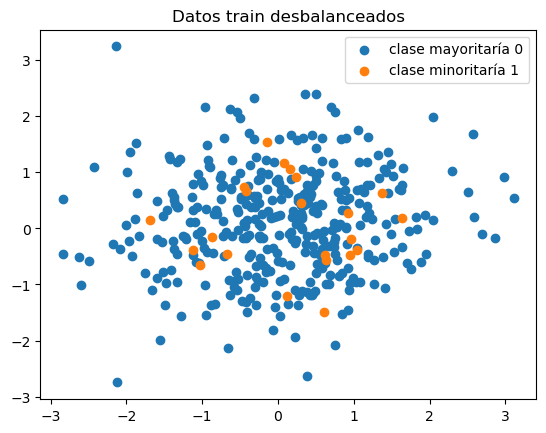

In [45]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='clase mayoritaría 0')

plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='clase minoritaría 1')
plt.title('Datos train desbalanceados')
plt.legend()

d:\Nueva carpeta\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Nueva carpeta\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Nueva carpeta\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        94
           1       0.00      0.00      0.00         6

    accuracy                           0.94       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.88      0.94      0.91       100



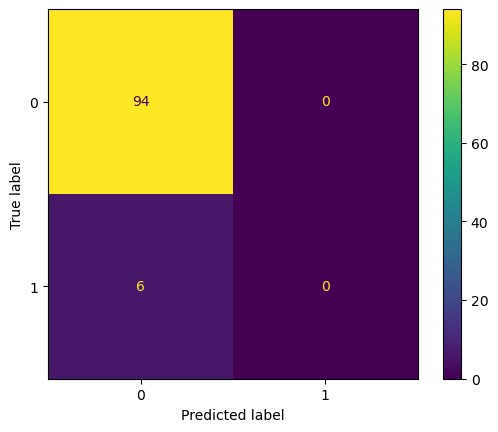

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train) # Nos balancea

print('Tamaño X_train', X_train.shape)
print('Distribución clase train', np.bincount(y_train))

print('Tamaño X_test', X_train_resample.shape)
print('Distribución clase test', np.bincount(y_train_resample))

Tamaño X_train (400, 10)
Distribución clase train [378  22]
Tamaño X_test (756, 10)
Distribución clase test [378 378]


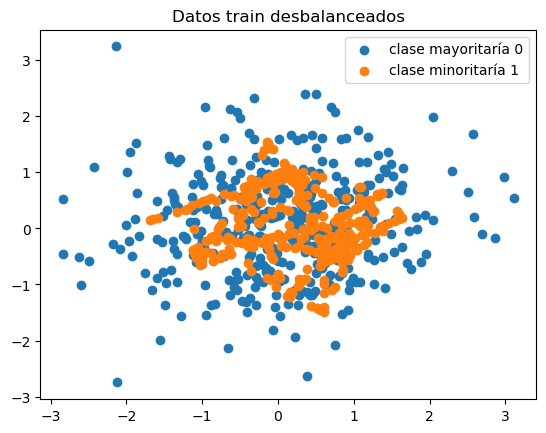

In [48]:
plt.scatter(X_train_resample[y_train_resample == 0, 0], X_train_resample[y_train_resample == 0, 1], label='clase mayoritaría 0')

plt.scatter(X_train_resample[y_train_resample == 1, 0], X_train_resample[y_train_resample == 1, 1], label='clase minoritaría 1')
plt.title('Datos train desbalanceados')
plt.legend()

## Introducimos los Datos en un Pipeline

In [49]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        94
           1       0.25      0.67      0.36         6

    accuracy                           0.86       100
   macro avg       0.61      0.77      0.64       100
weighted avg       0.93      0.86      0.89       100



In [50]:


pipeline = make_pipeline(
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        94
           1       0.29      0.67      0.40         6

    accuracy                           0.88       100
   macro avg       0.63      0.78      0.67       100
weighted avg       0.94      0.88      0.90       100



## Clasificación y Transformación con Pipeline

In [51]:
df = pd.read_csv("/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv")
names = df['name']
df.drop(['name','id', 'host_id', 'host_name','last_review'], axis=1, inplace=True)

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Transformación de Datos

In [53]:
from sklearn.model_selection import train_test_split

X = df[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
y = df[['price']]



numerical_col = X.select_dtypes(include=[np.number]).columns.to_list()
categorical_col = X.select_dtypes(exclude=[np.number]).columns.to_list()

pipeline_categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])
   
pipeline_numerical = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
])

preprocesor = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_col),
    ('categorical', pipeline_categorical, categorical_col)
])

X_transformed = preprocesor.fit_transform(X)

## KMEANS

In [54]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(X_transformed)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,cluster
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,4
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,4
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,4
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1


In [55]:
df.groupby("cluster")["neighbourhood_group"].value_counts()

cluster  neighbourhood_group
0        Manhattan                557
         Brooklyn                   2
1        Manhattan              13024
         Brooklyn               12870
         Queens                  1736
         Bronx                    276
         Staten Island            128
2        Brooklyn                2457
         Manhattan               2236
         Queens                   551
         Bronx                    112
         Staten Island             58
3        Queens                  2557
         Bronx                    493
         Brooklyn                 315
4        Manhattan               5844
         Brooklyn                4460
         Queens                   822
         Bronx                    210
         Staten Island            187
Name: count, dtype: int64

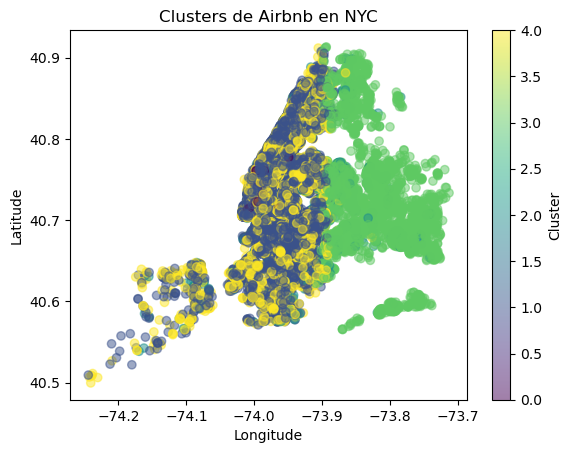

In [56]:

plt.scatter(df["longitude"], df["latitude"], c=df["cluster"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de Airbnb en NYC")
plt.show()

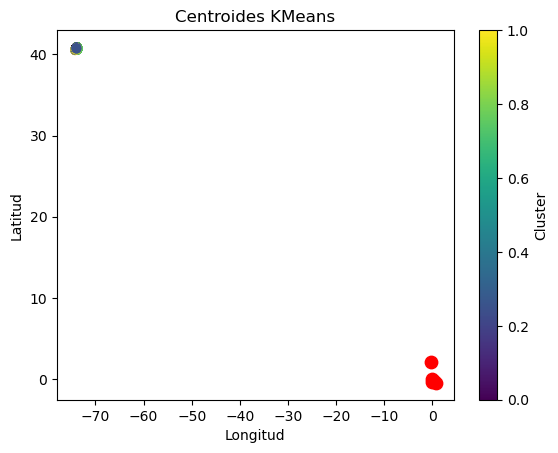

In [57]:
plt.scatter(x=df['longitude'], y=df['latitude'], c=kmeans.labels_, alpha=0.7, cmap='viridis')  # Puntos de datos con colores según los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=80)  # Centroides en rojo
plt.title('Centroides KMeans')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Cluster')  # Muestra la leyenda de colores
plt.show()

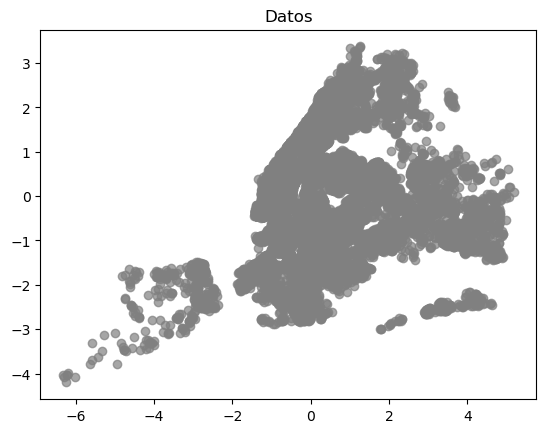

In [58]:
scaler = StandardScaler()

long = scaler.fit_transform(df[['longitude']])
lat = scaler.fit_transform(df[['latitude']])

plt.scatter(x=long, y=lat, c='gray', alpha=0.7)
plt.title('Datos');

## Datos con Centroides uno de los centroides tiene un desplazamiento inusual

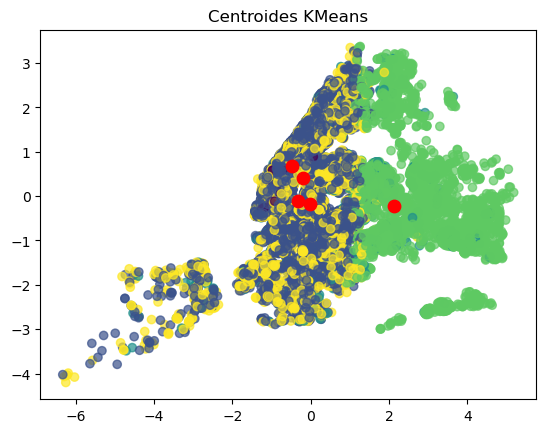

In [59]:
plt.scatter(x=long, y=lat, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', s=80)
plt.title('Centroides KMeans');